In [1]:
import pandas as pd
# Convert to DataFrame


In [4]:
d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/filtered_mnist.csv')

In [5]:
d

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
19958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
19959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
19960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [6]:
X = d.drop(['label'], axis=1)
Y = d["label"]

In [7]:
X.shape

(19962, 784)

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19962 entries, 0 to 19961
Columns: 785 entries, pixel1 to label
dtypes: int64(785)
memory usage: 119.6 MB


In [10]:
X_train, X_test, y_train, y_test = X[:17109], X[17109:], Y[:17109], Y[17109:]


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

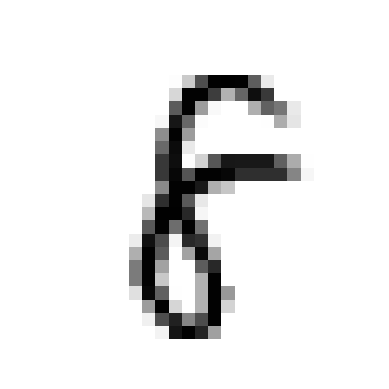

CPU times: total: 156 ms
Wall time: 474 ms


c:\Users\CloudJunction\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ True,  True]])

In [14]:
%%time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train.astype(float) >= 5)
#print(y_train_large)
y_train_even = (y_train.astype(float) % 2 == 0)
# Following line combines the two binary arrays (y_train_large and y_train_odd) horizontally
# into a single array using numpy's c_ function. This forms a multi-label
# dataset where each sample can belong to multiple classes
#(in this case, "large" and "odd").
y_multilabel = np.c_[y_train_large, y_train_even]
# print(y_multilabel)
y_test_large = (y_test.astype(float) >= 5)
y_test_even = (y_test.astype(float) % 2 == 0)
y_multilabel_test = np.c_[y_test_large, y_test_even]
#print(y_multilabel_test)

model1 = KNeighborsClassifier()
model1.fit(X_train, y_multilabel)
#some_digit = X.iloc[1000] # change index number from 0 to 69999
#some_digit = X.iloc[50] # 3 is at index 50
some_digit = X.iloc[120] # 7 is at index 120
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()
model1.predict([some_digit])

In [15]:
%%time
Y_pred=model1.predict(X_test)
#print(Y_pred)

CPU times: total: 6.59 s
Wall time: 2.42 s


In [19]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report,confusion_matrix
from sklearn import metrics

In [20]:
# confusion matrix
mcm = multilabel_confusion_matrix(y_multilabel_test, Y_pred)
# Iterate over each label
for i in range(len(mcm)):
    tn, fp, fn, tp = mcm[i].ravel()
    print(f"Label {i+1}:")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")

#classification report
target_names = ['large label', 'evem label']
print(classification_report(y_multilabel_test, Y_pred,target_names=target_names))

# Model Accuracy
print("The accuracy is "+str(metrics.accuracy_score(y_multilabel_test,Y_pred)*100)+"%")

Label 1:
True Positives: 1860
False Positives: 1
True Negatives: 981
False Negatives: 11
Label 2:
True Positives: 1941
False Positives: 5
True Negatives: 889
False Negatives: 18
              precision    recall  f1-score   support

 large label       1.00      0.99      1.00      1871
  evem label       1.00      0.99      0.99      1959

   micro avg       1.00      0.99      1.00      3830
   macro avg       1.00      0.99      1.00      3830
weighted avg       1.00      0.99      1.00      3830
 samples avg       1.00      0.99      1.00      3830

The accuracy is 98.84332281808622%
